# CONVOLUTION NEURAL NETWORK



```
1. data collection
        100 images for each class
        dataset training set 70
                bear 70
                dog 70
                cat 70
                horse 70
                elephant 70
        testing set 30
                bear 30
                dog30
                cat30
                horse30
                elephant30
2. image preprocessing
        1.import image data generator
        2. configure the image data generator class
        3.apply image data generator functionality

3. model building
        1.import all the necessary model building libraries
        2. initiliaze the model
        3.add convolution layer
        4.max pooling layer
        5.add flatten layer (input of ann)
        6.add hidden layer
        7.add output layer
        8.complile the model
        9. fit the model

4.save the model
5.random value prediction!
```



In [ ]:
!unzip /content/CNN_animals.zip

Archive:  /content/CNN_animals.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  infla

In [ ]:
#import model building Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# IMAGE GENERATOR

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# configure data generator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Apply image data generator functionality to train and test images
x_train = train_datagen.flow_from_directory(r'/content/dataset/Training', target_size=(64,64), batch_size=32, class_mode = "categorical")
x_test = train_datagen.flow_from_directory(r'/content/dataset/Testing', target_size=(64,64), batch_size=32, class_mode = "categorical")

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# MODEL BUILDING

In [ ]:
# initializing the model
model = Sequential()

In [ ]:
# Add convoloution layer (no. of filters, size of filter, input shape, activation="relu")
model.add(Convolution2D(32, (3,3),input_shape = (64,64,3), activation ="relu"))

In [ ]:
# Add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# add flatten layer
model.add(Flatten())

In [ ]:
# Add ANN hidden layer
model.add(Dense(units=128, activation ="relu"))

In [ ]:
# Add output layer
model.add(Dense(units = 4, activation = "softmax"))

In [ ]:
# Compile the model (Loss fn, accuracy, optimizer)
model.compile( loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

In [ ]:
# fit model (x_train, steps per epoch, epochs, validation_data, validation_steps)
model.fit (x_train, steps_per_epoch=39, epochs=5, validation_data=x_test, validation_steps=10)

Epoch 1/5
39/39 [==============================] - 14s 323ms/step - loss: 1.5154 - accuracy: 0.3683 - val_loss: 1.1038 - val_accuracy: 0.5562
Epoch 2/5
39/39 [==============================] - 13s 321ms/step - loss: 0.9973 - accuracy: 0.5929 - val_loss: 0.8109 - val_accuracy: 0.7281
Epoch 3/5
39/39 [==============================] - 12s 310ms/step - loss: 0.7941 - accuracy: 0.6882 - val_loss: 0.6627 - val_accuracy: 0.7406
Epoch 4/5
39/39 [==============================] - 12s 311ms/step - loss: 0.7322 - accuracy: 0.7149 - val_loss: 0.6444 - val_accuracy: 0.7375
Epoch 5/5
39/39 [==============================] - 12s 292ms/step - loss: 0.6432 - accuracy: 0.7480 - val_loss: 0.5194 - val_accuracy: 0.8313




```
steps_per_epoch = no of samples in training set / batch size
= 1238/32 = 38.6 = 39
```



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

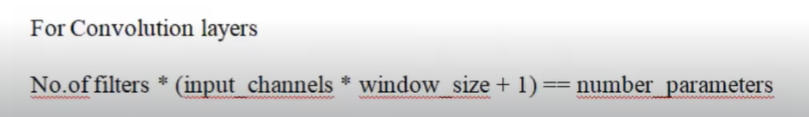

In [ ]:
32*(3*(3*3)+1)

896

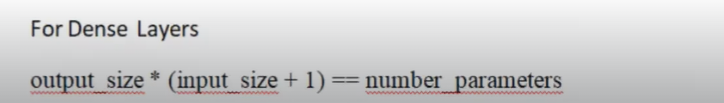

In [ ]:
128*(30752 + 1)

3936384

In [ ]:
model.save("animals_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# IMPORT AND TEST THE MODEL

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np

In [ ]:
model = load_model(r'/content/animals_cnn.h5', compile = False)

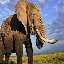

In [ ]:
img = image.load_img(r"/content/elephant.jpeg", target_size = (64,64))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[169., 183., 212.],
        [167., 187., 220.],
        [150., 180., 234.],
        ...,
        [122., 144., 202.],
        [129., 147., 195.],
        [131., 146., 185.]],

       [[188., 205., 231.],
        [196., 214., 238.],
        [181., 200., 233.],
        ...,
        [112., 134., 194.],
        [129., 147., 195.],
        [138., 153., 192.]],

       [[159., 178., 208.],
        [188., 206., 226.],
        [200., 215., 234.],
        ...,
        [113., 134., 197.],
        [122., 140., 190.],
        [135., 150., 189.]],

       ...,

       [[ 79.,  63.,  38.],
        [ 71.,  59.,  43.],
        [ 16.,  18.,   0.],
        ...,
        [117., 117.,  63.],
        [ 68.,  69.,  29.],
        [ 92.,  89.,  56.]],

       [[ 62.,  51.,  31.],
        [ 58.,  53.,  34.],
        [ 26.,  34.,  11.],
        ...,
        [116., 119.,  42.],
        [ 96.,  96.,  34.],
        [148., 145.,  94.]],

       [[ 11.,  11.,   0.],
        [  9.,  13.,   0.],
        [ 21.,  

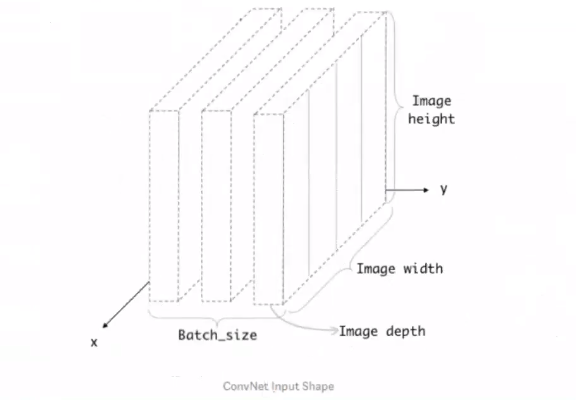



```
4 parameters input
```



In [ ]:
 x = np.expand_dims(x, axis=0)
 x.ndim

4

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 124ms/step


array([[0., 0., 1., 0.]], dtype=float32)

In [ ]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [ ]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([2])

In [ ]:
x_train.class_indices['elephants']

2